In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [ ]:
data = pd.read_csv("../data/raw/flight_dataset.csv")
data.head()
data.drop(columns="Unnamed: 0", axis=1, inplace=True)


In [19]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_prefix     300153 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 27.5+ MB
None
            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660

### Initial Analysis

There are 3 numerical columns and 7 categorical columns in the data set.

In [5]:
categorical_features = data.select_dtypes(include = ['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64','float64']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['duration', 'days_left', 'price']
Categorical features: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


### Visualize the features

Visualize with histograms for numberical features and 
with count plots for categorical features.

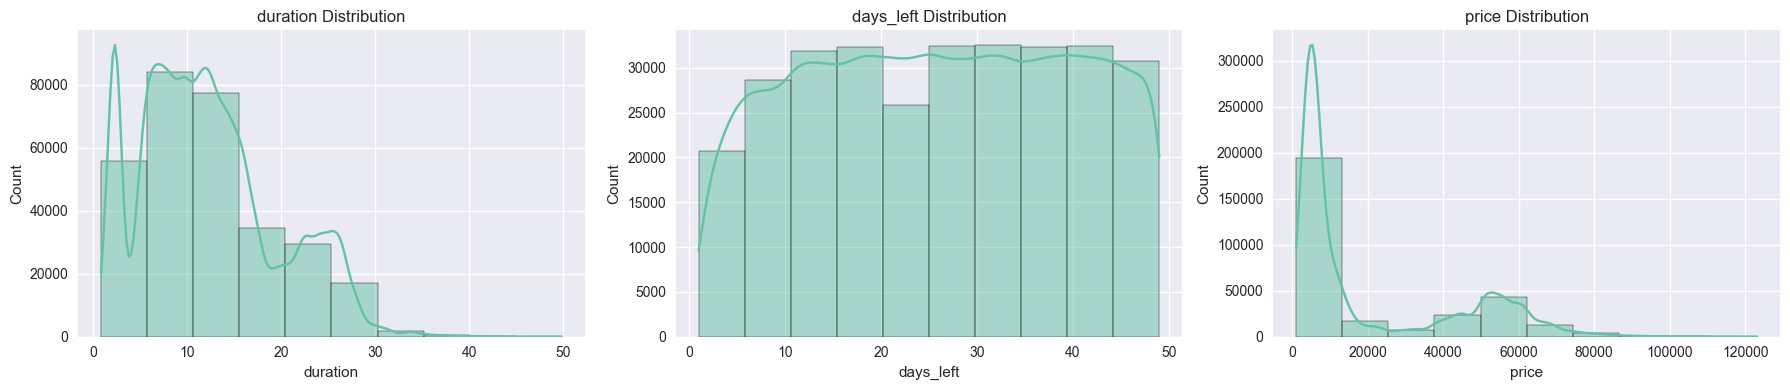

In [56]:

num_features = numerical_features  # your 2 numerical features
n = len(num_features)

fig, axes = plt.subplots(1, n, figsize=(6*n, 4))  # 1 row, n columns

for i, col in enumerate(num_features):
    ax = axes[i] if n > 1 else axes
    sns.histplot(data[col], bins=10, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

According to the histograms above, the followings point can be known

* The majority of the flight durations are below 3o hours, with below 10 hours the most common followed by 10-20 and 20-30 hours
* There are similar number of people booking 10 to 50 days in advance but people who purchase 0-10 days before flight date is relatively less.
* The price of the majority of flights are well below 20000 (around 16000 to be exact) and there are also substantial amout of fllights with higher price range in the range between 40000 to 80000

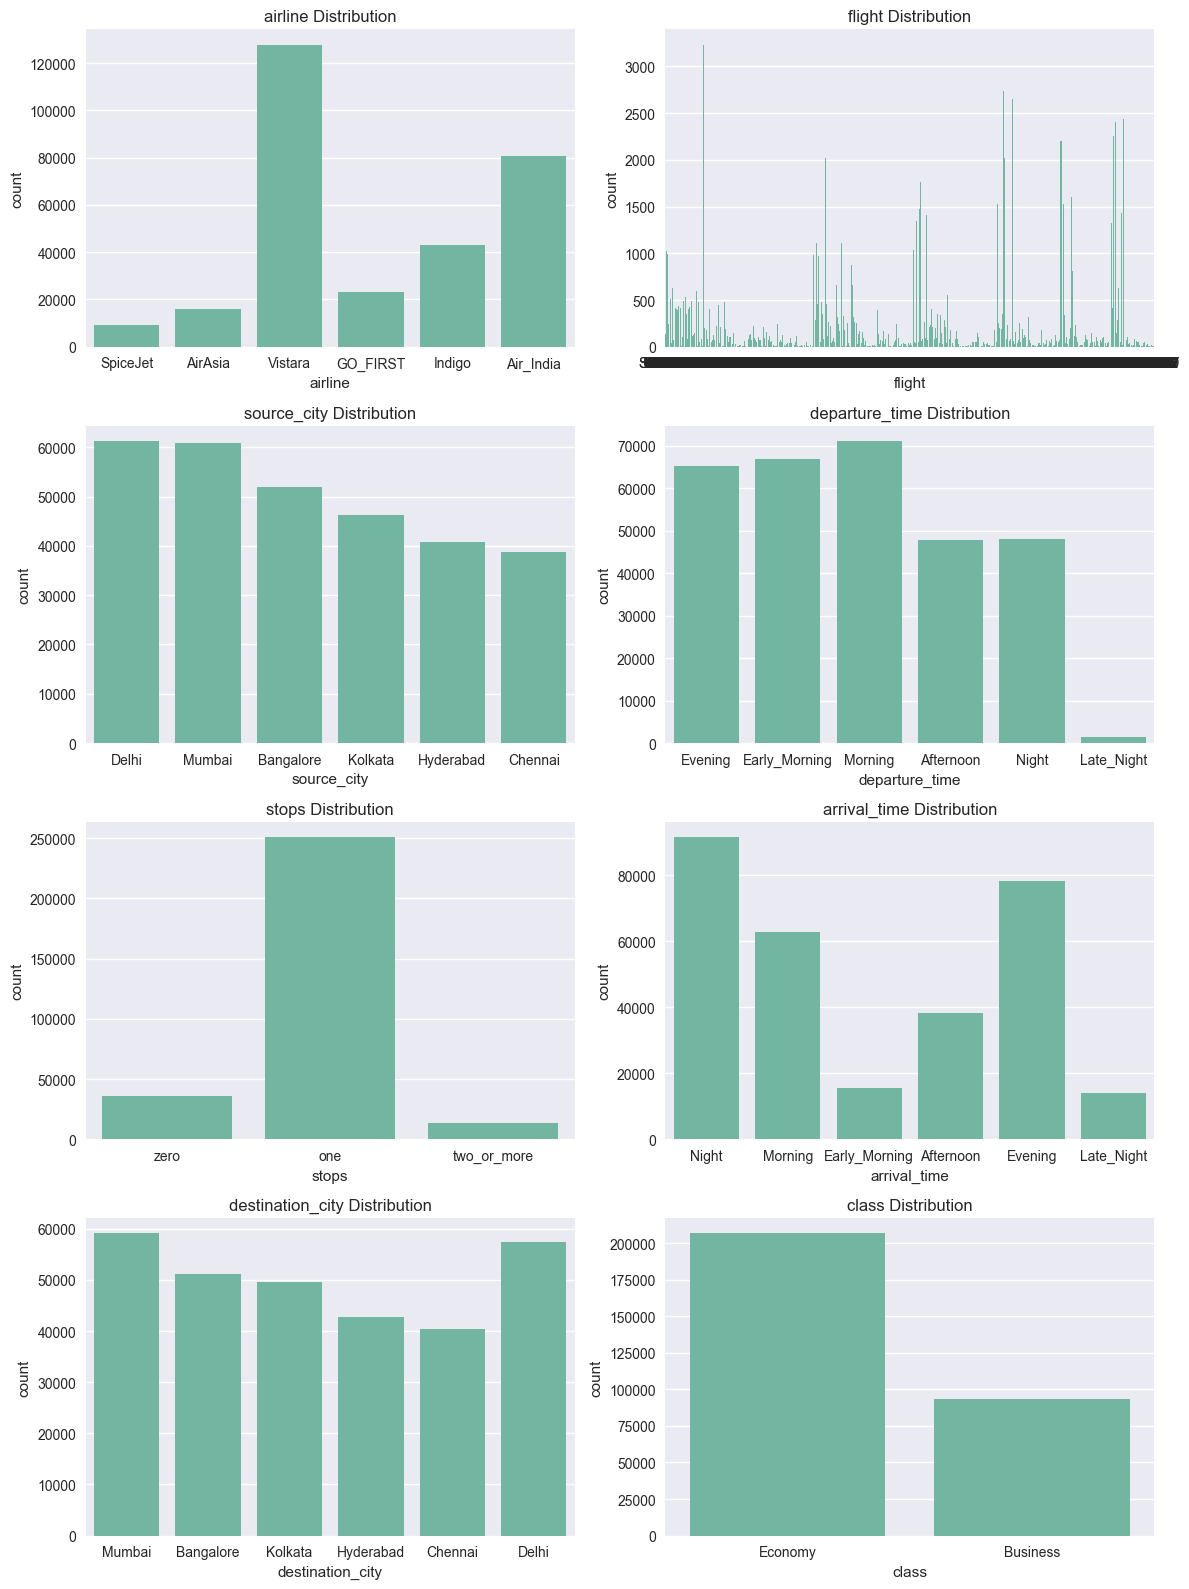

In [7]:

cat_features = categorical_features  # your 2 numerical features
n = len(cat_features)

fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # fixed 8 plots
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

Observing these countplots, 
* The Vistara and Air India are the majority airlines in india occupying approximately 75% of all the flights in the dataset followed by Indigo, GoFirst, AirAsia and SpiceJet
* There are 2 many values for flight column, we need to find a way to handle this.
* For the column source city and destination city, Dehli and Mumbai are the most frequent followed by Bangalore, Kolkata, Hyderabab and Chennai.
* overwhelming majority of the stops column in the data set are one and few zeros and and fewer 2 or more stops.
* For the departure time, Evening, morning and early morning are the most common followed by Afternoon and Night with very few Late Night.
* For the arrival time, Night is follwed by Evening, Morning and Afternoon and few Early Moring and Late Night.
* There are more than 2 times economy travels than business trvael.

In [ ]:
len(data["flight"].unique())

476

In [48]:
data["flight"] = data["flight"].astype(str)
data["flight_prefix"] = data["flight"].str[:2]
data["flight_prefix"] = data["flight_prefix"].astype("category")

In [10]:
len(data["flight_prefix"].unique())

6

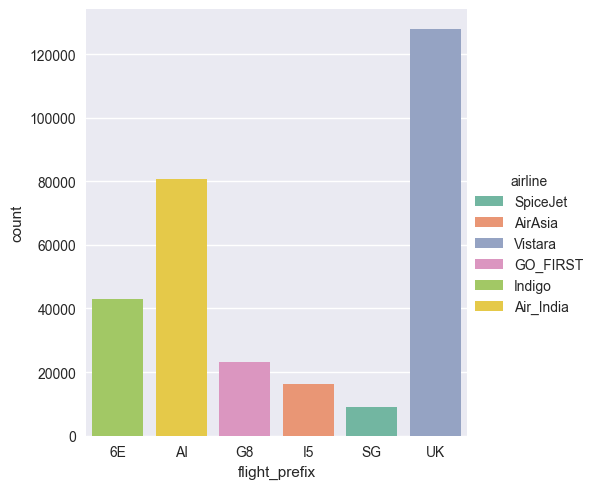

In [57]:
sns.catplot(x = "flight_prefix", kind = "count", data = data, hue = "airline")
plt.show()

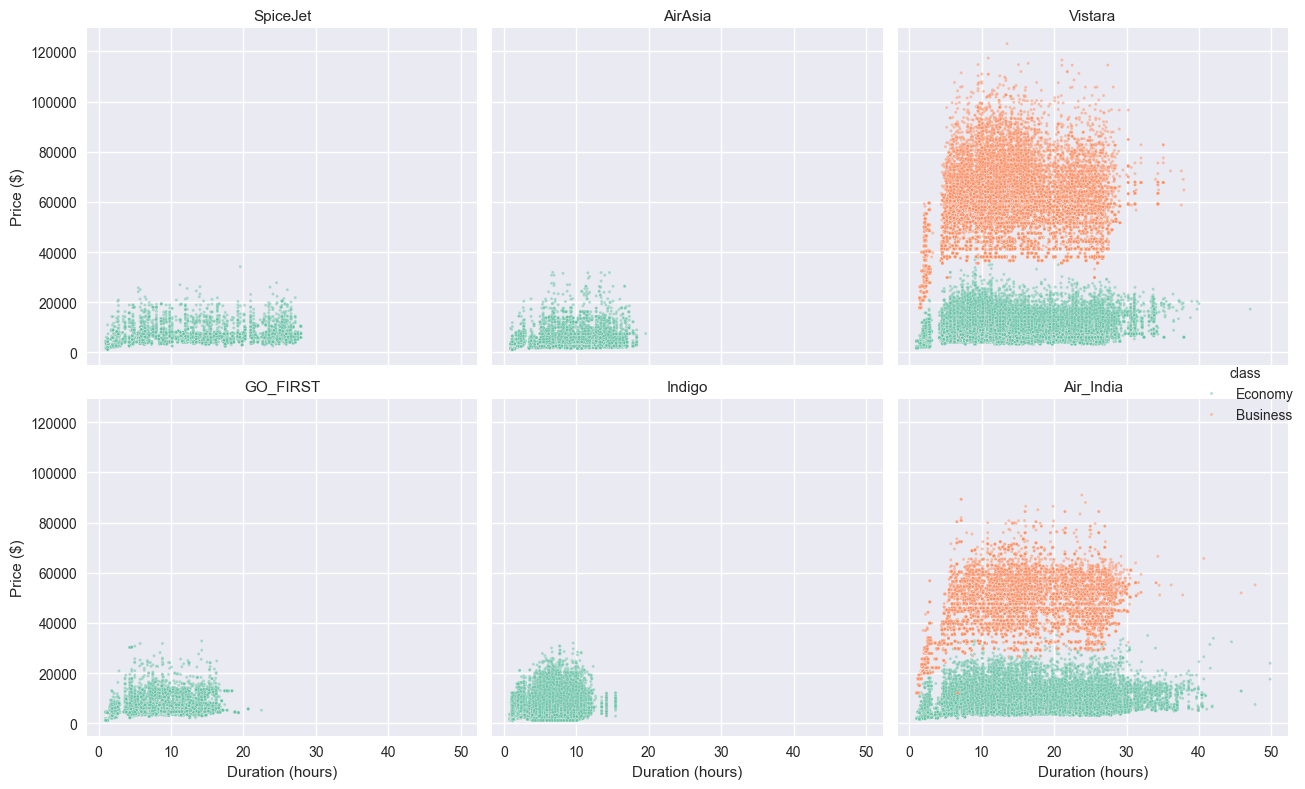

In [53]:
g = sns.FacetGrid(data, col="airline", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="duration", y="price", hue = "class", alpha=0.5, s = 5)
g.add_legend(title="class")
g.set_axis_labels("Duration (hours)", "Price ($)")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

It can be seen from here that only Vistara and Air India only offers Business class option and there is a signficant price between classes with majority of business classes higher than economy classes

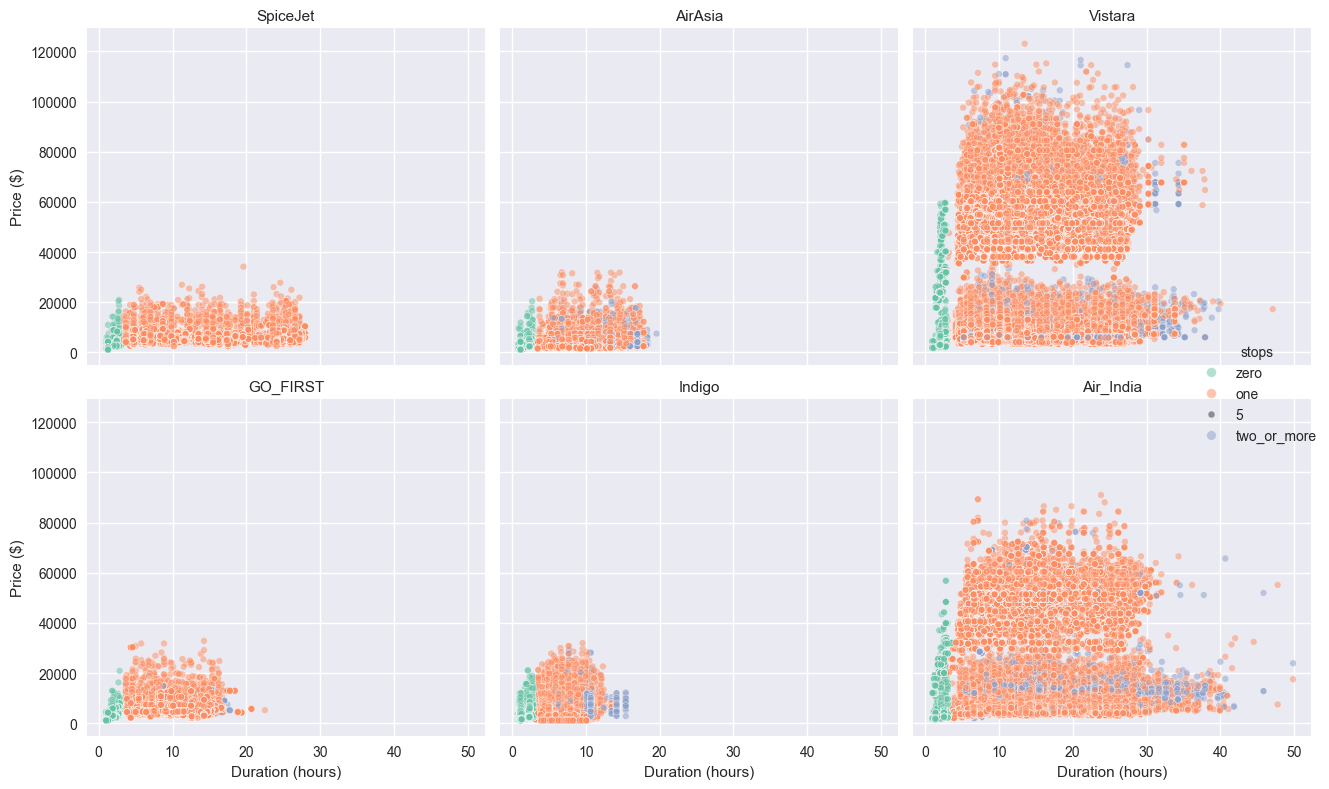

In [54]:
h = sns.FacetGrid(data, col="airline", col_wrap=3, height=4)
h.map_dataframe(sns.scatterplot, x="duration", y="price", hue = "stops", alpha= 0.5,size=5)
h.add_legend(title="stops")
h.set_axis_labels("Duration (hours)", "Price ($)")
h.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

for the love duration flights under 5 hours, the majority of the flights have zero transit, which is reasonable.  The majority of flights has 1 transit within a wide range of durations and price. And the flghts with 2 or more transit do not seem to be cheaper significantly,

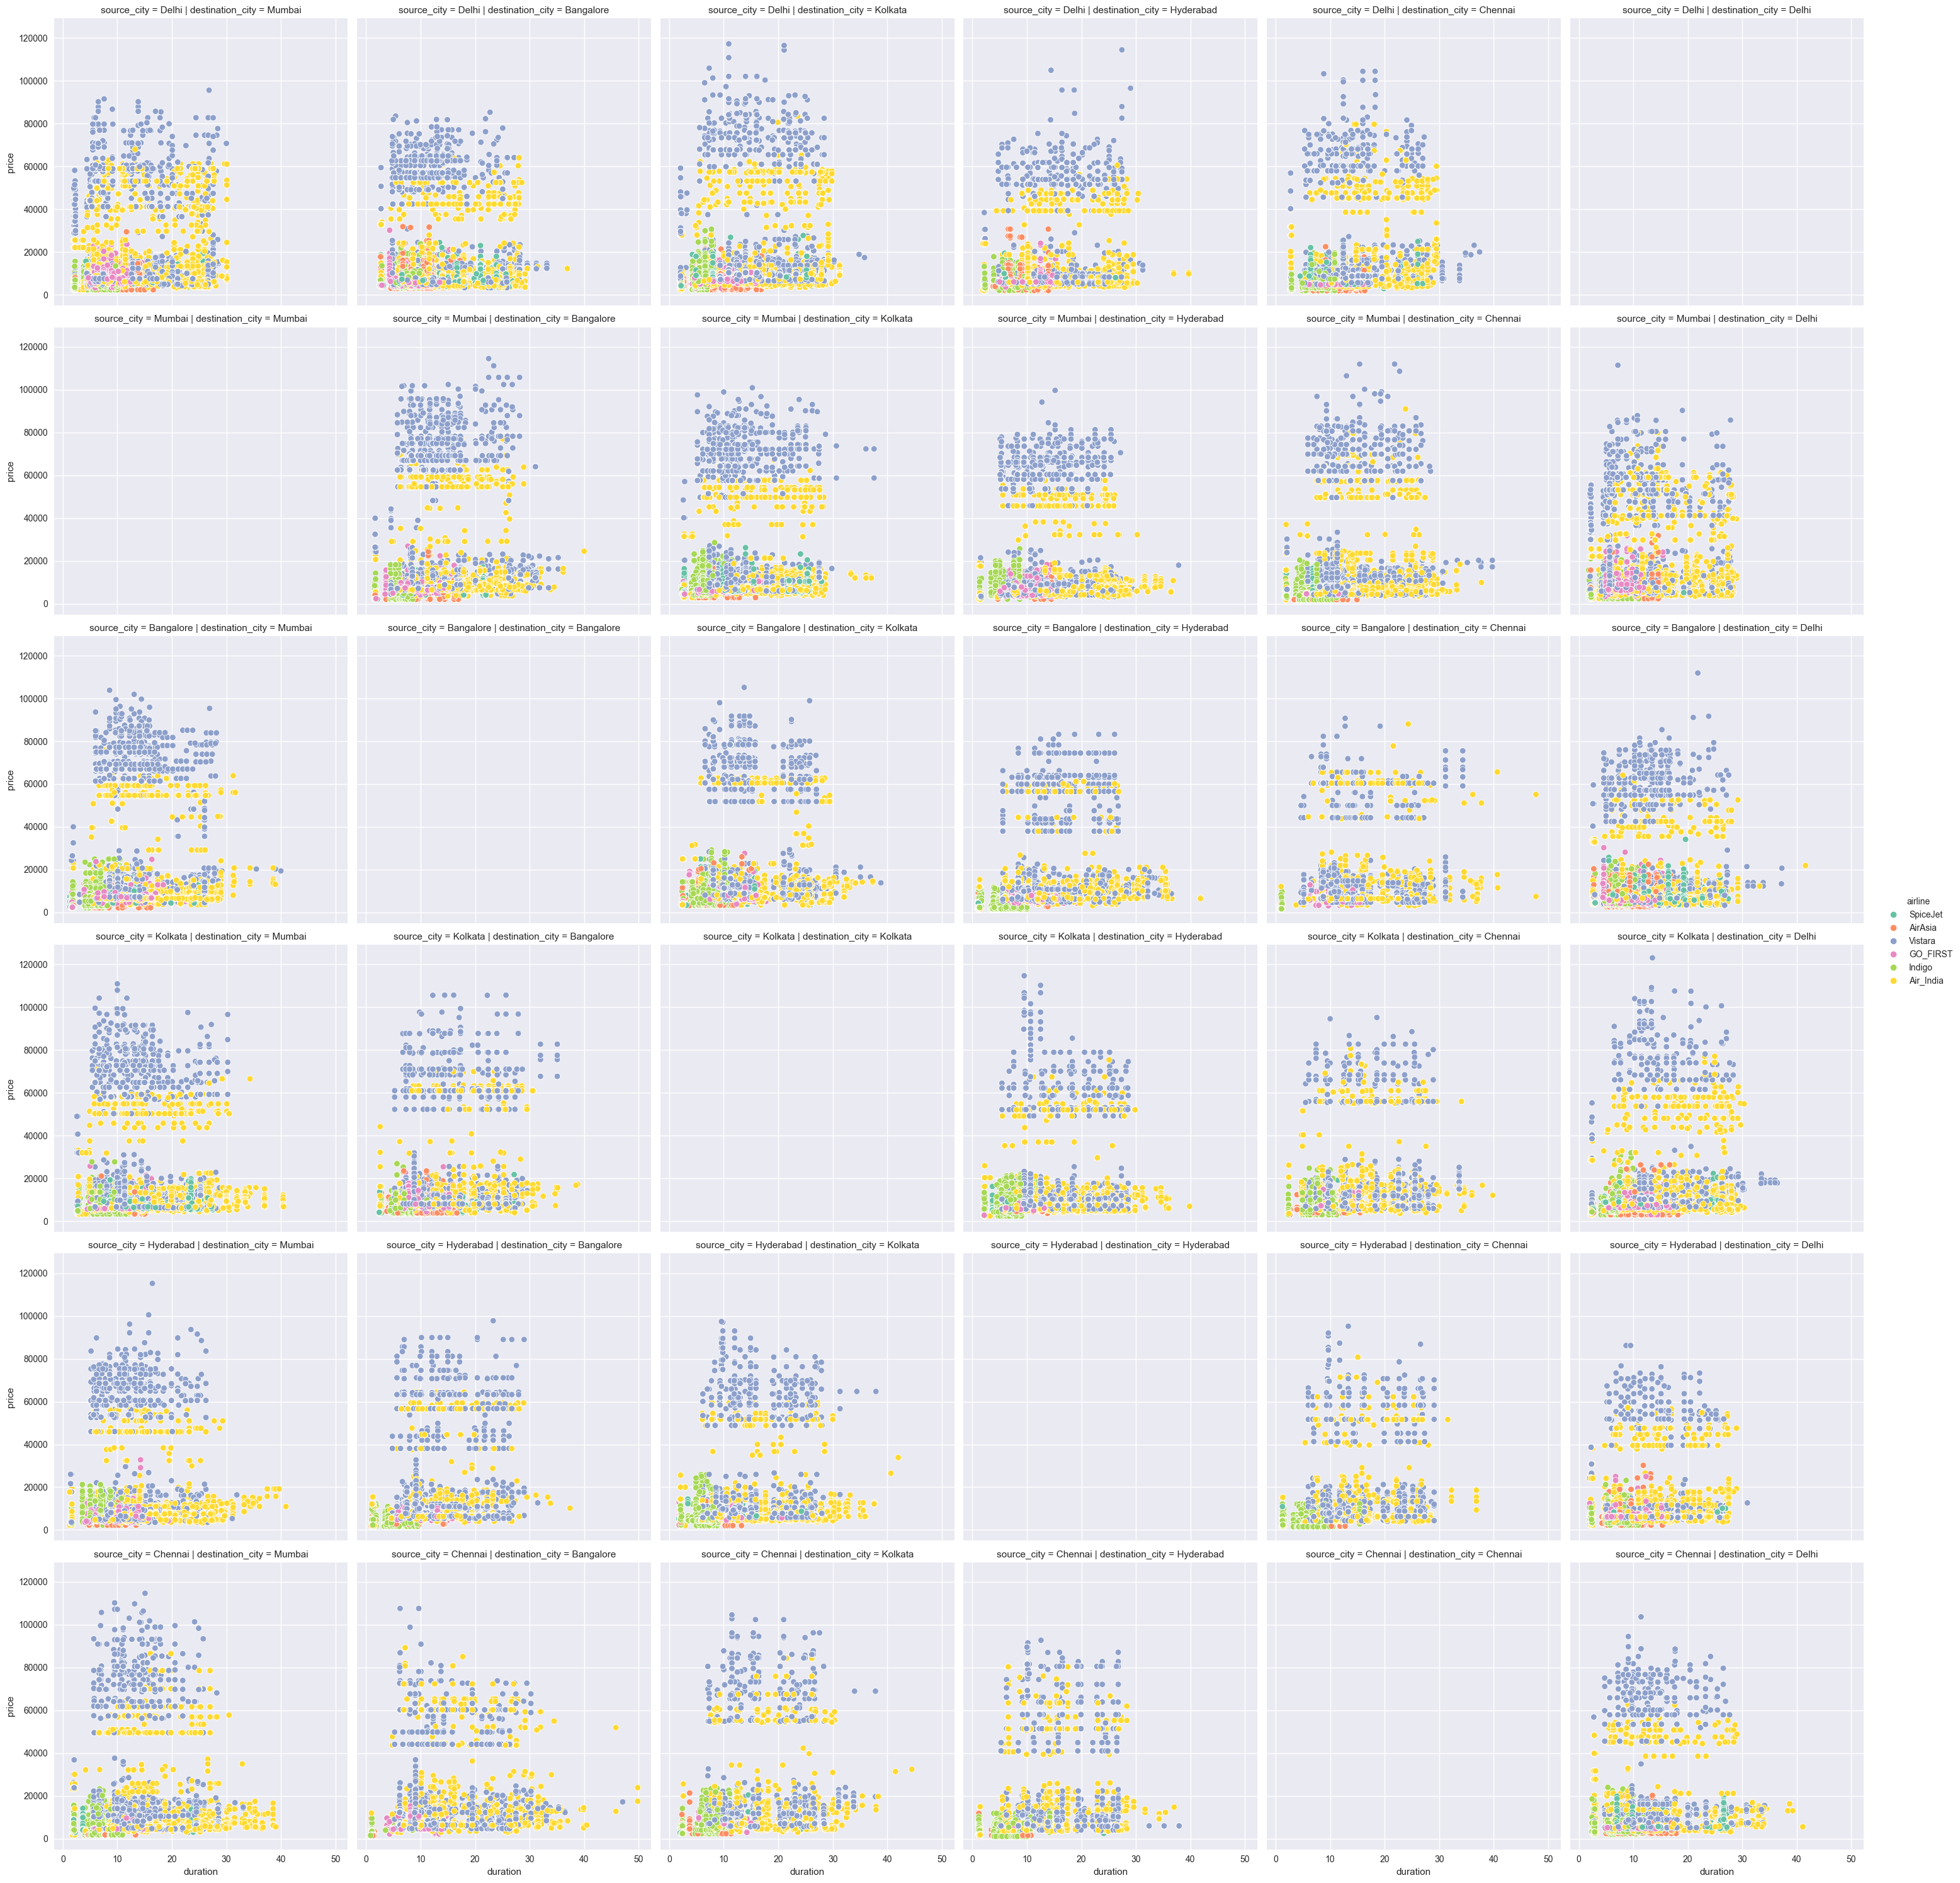

In [55]:
sns.relplot(data = data, x = "duration", y="price", row="source_city", col="destination_city", hue = "airline")

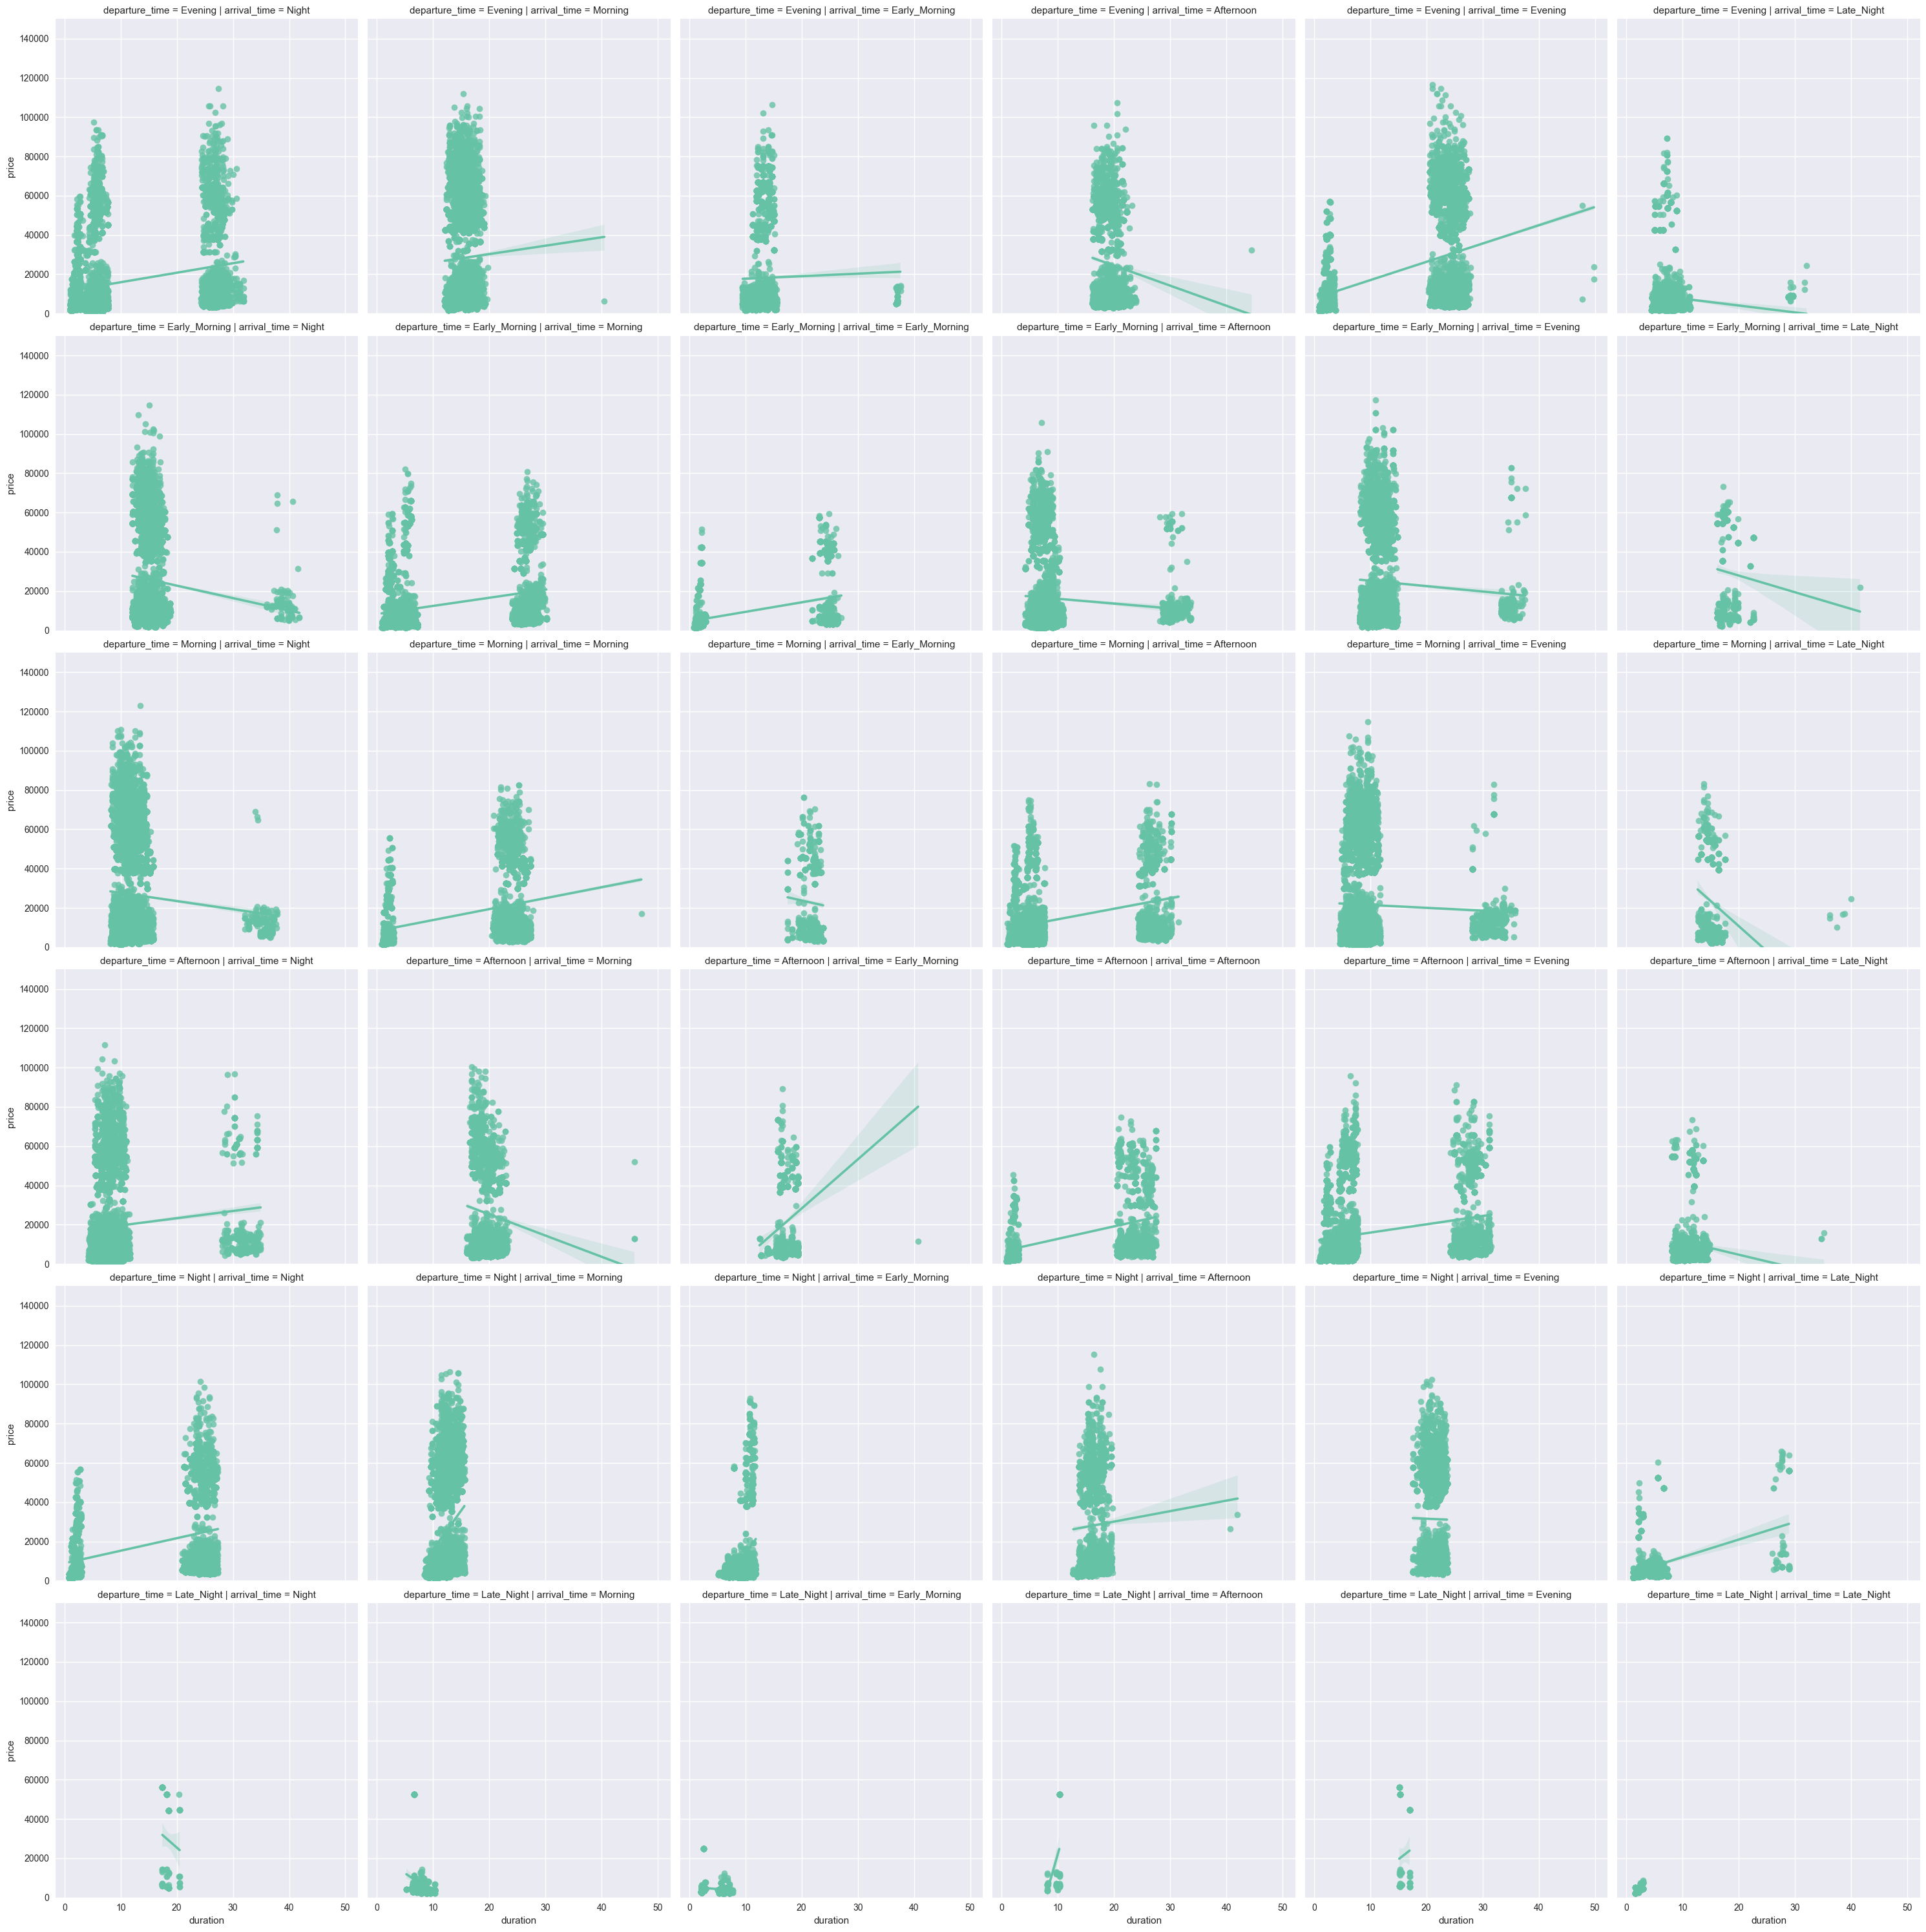

In [18]:
gg = sns.lmplot(
    data = data,
    row = "departure_time",
    col = "arrival_time",
    x = "duration",
    y = "price"
)

gg.set(ylim = (0,150000))
plt.show()

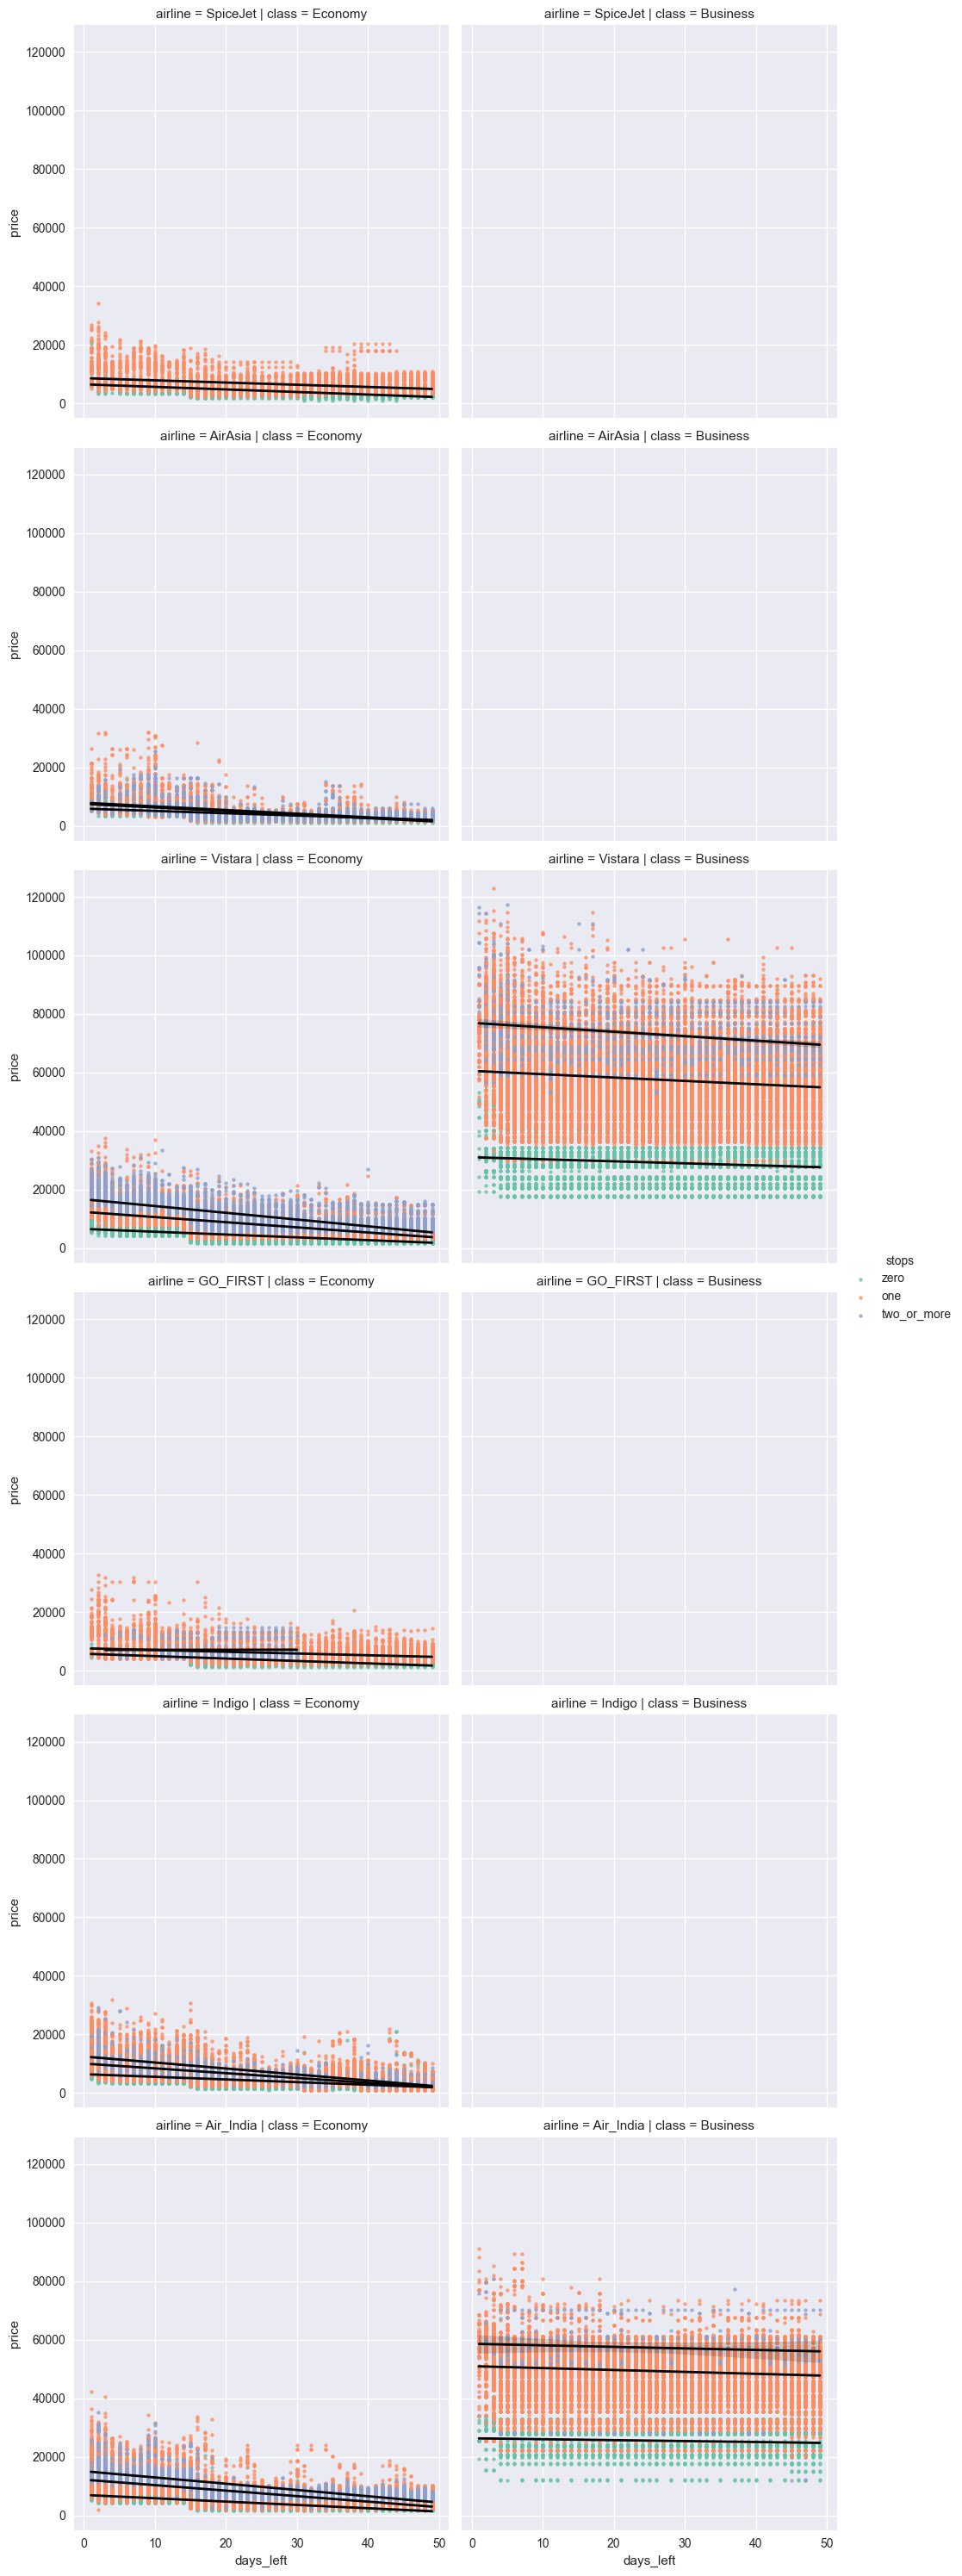

In [65]:
hh  = sns.lmplot(x = "days_left", y = "price", data = data, row = "airline", col="class", hue = "stops", line_kws={"lw": 2, "color": "black"}, scatter_kws = { "s":10})

<Axes: xlabel='stops', ylabel='duration'>

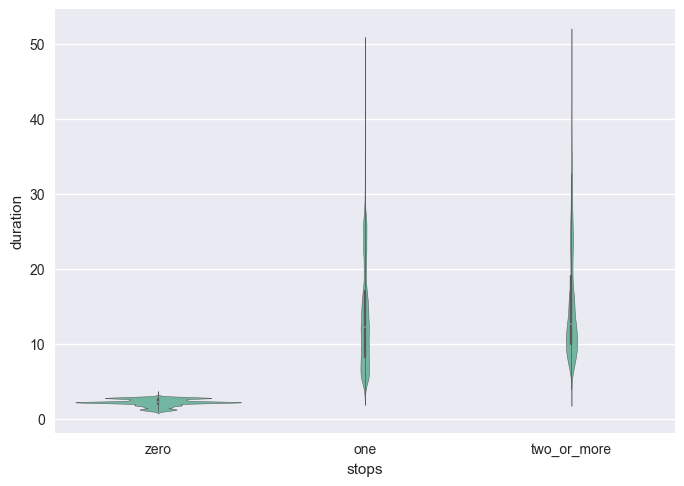

In [47]:
sns.violinplot(
    data= data,
    y = "duration",
    x = "stops"
)

<Axes: xlabel='flight_prefix', ylabel='price'>

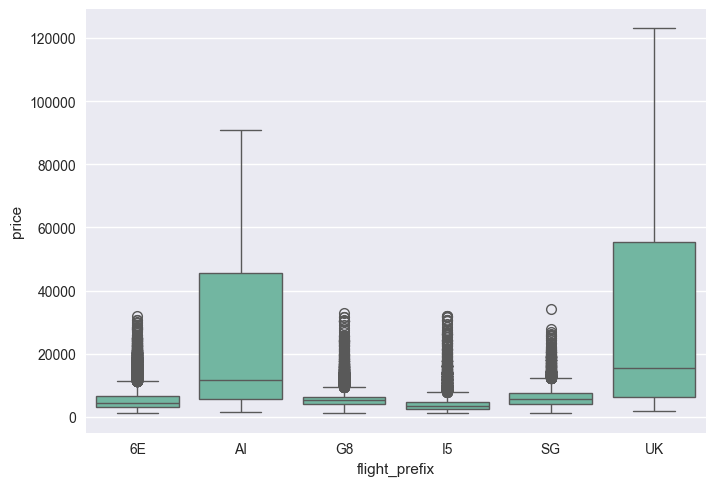

In [51]:
sns.boxplot(
    x = "flight_prefix",
    y = "price",
    data = data,
)

<Axes: xlabel='airline', ylabel='price'>

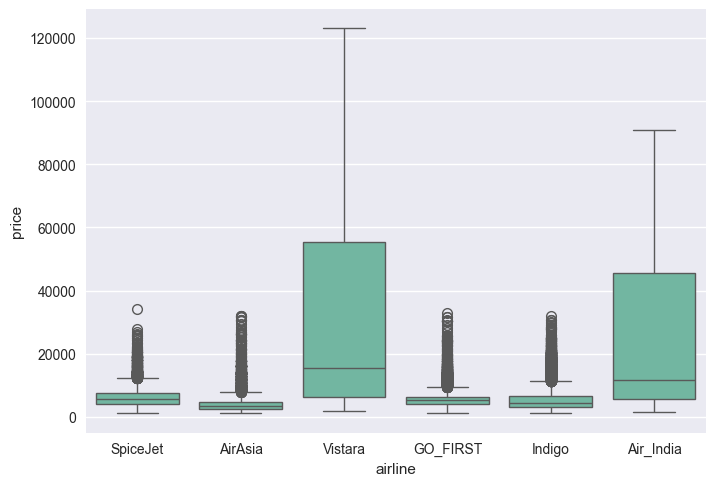

In [52]:
sns.boxplot(
    x = "airline",
    y = "price",
    data = data,
)

In [68]:
print(data.columns.tolist())
data_drp = data.drop(["flight","flight_prefix"], axis = 1)
print(data_drp.columns.tolist())

['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price', 'flight_prefix']
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [69]:
corr = data_drp.corr()
print(corr)

ValueError: could not convert string to float: 'SpiceJet'